# THE SPARKS FOUNDATION

## Data Science and Business Analytics Intern - September 2021

### Task 6: Prediction using Decision Tree Algorithm
  
**`Problem Statement:`**
- Create a Decision Tree Classifier and visualise it graphically.
- If any new data is fed to the classifier, then it should be able to predict the right class accordingly.

***By MAMATHA E***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# importing necessary packages for visualising the tree
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


#### Understanding the Data

In [3]:
# Read data and store it in a dataframe
iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking the dataset information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Checking statistical info
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Checking for null values
iris.isnull().sum()/len(iris) * 100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [7]:
# Species in the data set and also checking for class imbalance
iris.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

**`Inferences: `** 
- No null values present in the data set.
- There is no class imbalance and it is equally distributed.

#### Visualisation the Data

In [8]:
# Fetching the features required for data visualisation
features = iris.columns[1:5]
features

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

Univariate Analysis

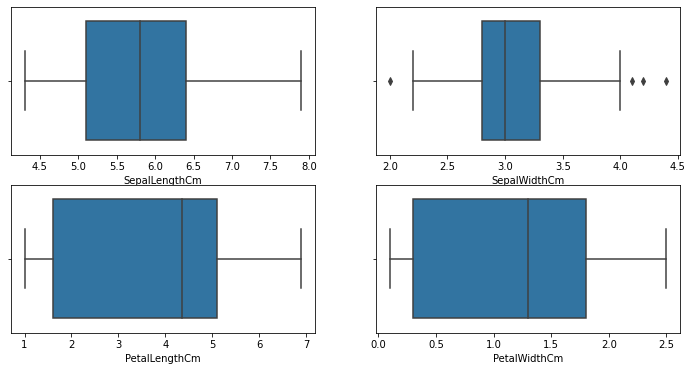

In [9]:
# Checking for outliers
plt.figure(figsize = [12,6])
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.boxplot(iris[features[i]])

**`Inference: `** There are no outliers except for the feature 'SepalWidthCm'. The size of data set is less, so no treatment for outliers will be carried out as it further reduces the data set size.

Bivariate Analysis

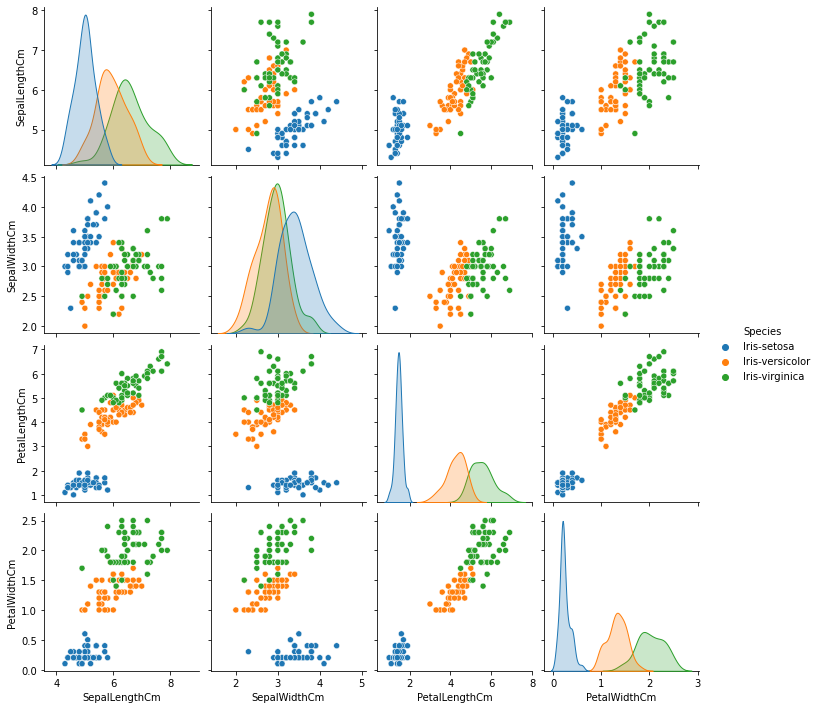

In [10]:
# Pairplot for numeric variables
sns.pairplot(iris, hue = 'Species', vars = features)
plt.show()

**`Inferences: `** 
- The pairplot shows that how the data points of each species is spread for any two features considered.
- There is kind of a linear relationship between 'PetalLengthCm' and 'PetalWidthCm'.

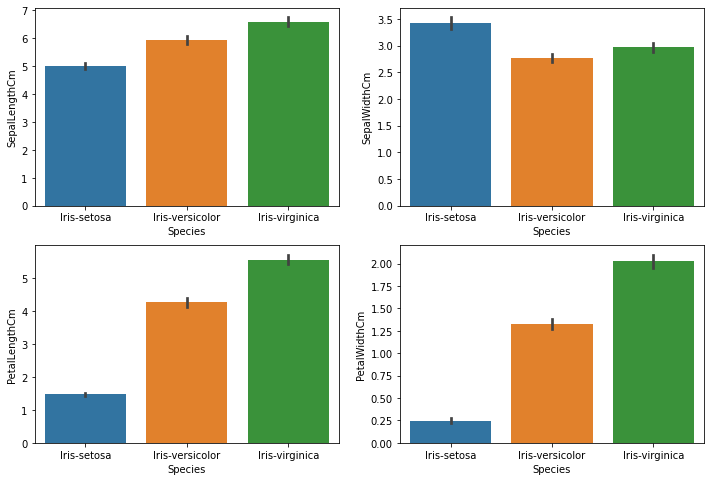

In [11]:
# Plot between Categorical and Numeric data
plt.figure(figsize = [12,8])
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.barplot(data = iris, x = 'Species', y = features[i])

**`Inferences: `**
- Iris-setosa: The 'SepalLengthCm', 'PetalLengthCm', and 'PetalWidthCm' is smaller and 'SepalWidthCm' is bigger when compared to other species.
- Iris-virginica: The 'SepalLengthCm', 'PetalLengthCm', and 'PetalWidthCm' is bigger and 'SepalWidthCm' is smaller when compared to other species.
- Iris-versicolor: All the features are in between the values of Iris-setosa and Iris-virginica.

#### Data Preparation

Create X and y i.e., independent and dependent variables respectively.

In [12]:
X = iris[features]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y = iris.Species
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

Perform train-test split

In [14]:
# Performaing train-test split of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

#### Model Building

Default Tree Model (Without any Hyper-Parameter Tuning)

In [15]:
# Building and fitting the decision tree classifier
tree =  DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
# Function to display the tree
def get_dt_graph(dt_classifier):

  dot_data = StringIO()
  export_graphviz(dt_classifier, out_file = dot_data, filled = True, rounded = True, feature_names = X.columns, 
                  class_names = ['Iris_setosa', 'Iris_virginica','Iris-versicolor'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  
  return graph

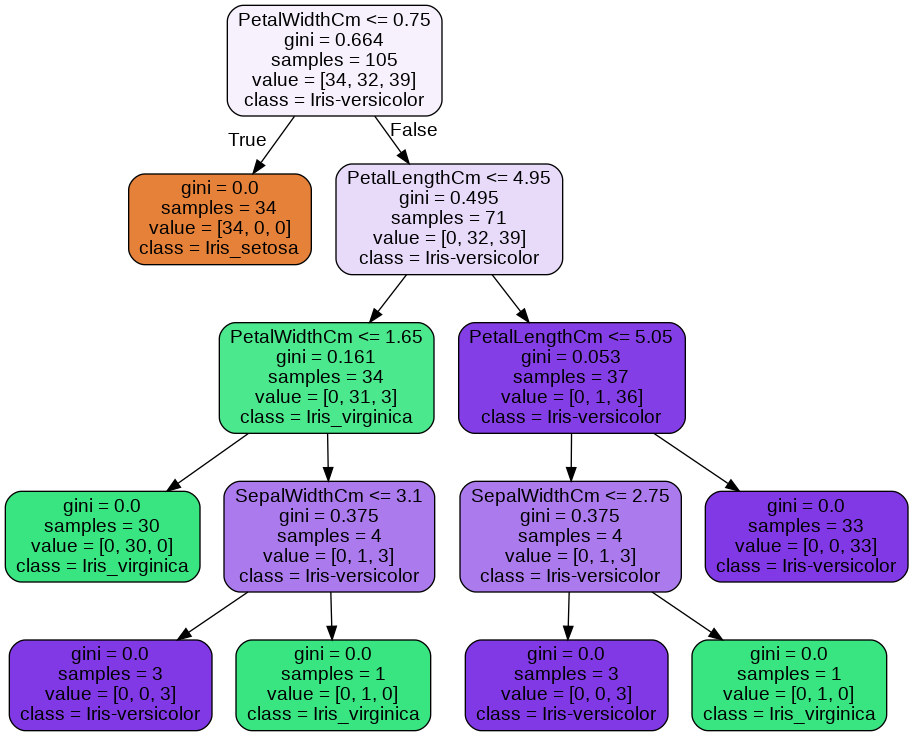

In [17]:
# Calling function to display the tree
g = get_dt_graph(tree)
Image(g.create_png())

Tree Model with Hyper-parameters Tuning using GridSearchCV()

In [18]:
# Including the parameter list to be tuned in a dictionary
params = {
    'max_depth': [2, 3],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15, 20],
    'min_samples_split': [5, 10, 15, 20, 25, 30, 35]
}

In [19]:
# Creating the GridSearchCV object and specifying the 4-fold cross validation
grid_search = GridSearchCV(estimator= tree, param_grid= params, cv = 4, n_jobs= -1, verbose= 1, scoring= 'accuracy')

In [20]:
# Fitting the estimator
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 112 candidates, totalling 448 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:    2.4s


CPU times: user 603 ms, sys: 44.9 ms, total: 648 ms
Wall time: 2.69 s


[Parallel(n_jobs=-1)]: Done 448 out of 448 | elapsed:    2.6s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3],
                         'min_samp

In [21]:
# Displaying the results after estimator fitting
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002816,0.000279,0.001499,0.000128,2,1,5,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.851852,1.0,0.961538,0.884615,0.924501,0.059035,16
1,0.002697,0.000063,0.001510,0.000124,2,1,10,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.851852,1.0,0.961538,0.884615,0.924501,0.059035,16
2,0.003604,0.001551,0.001484,0.000163,2,1,15,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.851852,1.0,0.961538,0.884615,0.924501,0.059035,16
3,0.002513,0.000069,0.002386,0.001779,2,1,20,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.851852,1.0,0.961538,0.884615,0.924501,0.059035,16
4,0.002388,0.000339,0.001374,0.000045,2,1,25,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.851852,1.0,0.961538,0.884615,0.924501,0.059035,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.002329,0.000109,0.001338,0.000017,3,20,15,"{'max_depth': 3, 'min_samples_leaf': 20, 'min_...",0.851852,1.0,0.961538,0.884615,0.924501,0.059035,16
108,0.002322,0.000197,0.003362,0.003488,3,20,20,"{'max_depth': 3, 'min_samples_leaf': 20, 'min_...",0.851852,1.0,0.961538,0.884615,0.924501,0.059035,16
109,0.003851,0.002913,0.001362,0.000114,3,20,25,"{'max_depth': 3, 'min_samples_leaf': 20, 'min_...",0.851852,1.0,0.961538,0.884615,0.924501,0.059035,16
110,0.003284,0.001749,0.001344,0.000064,3,20,30,"{'max_depth': 3, 'min_samples_leaf': 20, 'min_...",0.851852,1.0,0.961538,0.884615,0.924501,0.059035,16


In [22]:
# Finding the best model
best = grid_search.best_estimator_
best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
# Finding parameters of the best model
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}

#### Model Evaluation

In [24]:
# Function that evaluates the decision tree model
def evaluate_model(dt_classifier):
  
  y_train_pred = dt_classifier.predict(X_train)
  y_test_pred = dt_classifier.predict(X_test)
  
  print('Training Set Performance:')
  print('-'*60)
  confusion_matrix(y_train, y_train_pred)
  print('Accuracy: ', accuracy_score(y_train, y_train_pred))
  print(classification_report(y_train, y_train_pred))

  print('-'*60)

  print('Testing Set Performance:')
  print('-'*60)
  confusion_matrix(y_test, y_test_pred)
  print('Accuracy: ', accuracy_score(y_test, y_test_pred))
  print(classification_report(y_test, y_test_pred))

In [25]:
# Evaluate the default model performance
print('Default Model Performance')
print('-'*60)
evaluate_model(tree)

Default Model Performance
------------------------------------------------------------
Training Set Performance:
------------------------------------------------------------
Accuracy:  1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        34
Iris-versicolor       1.00      1.00      1.00        32
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105

------------------------------------------------------------
Testing Set Performance:
------------------------------------------------------------
Accuracy:  0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

  

In [26]:
# Evaluate the model with hyper-parameter tuning
print('Model with Hyper-Parameter Tuning Performance')
print('-'*60)
evaluate_model(best)

Model with Hyper-Parameter Tuning Performance
------------------------------------------------------------
Training Set Performance:
------------------------------------------------------------
Accuracy:  0.9809523809523809
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        34
Iris-versicolor       1.00      0.94      0.97        32
 Iris-virginica       0.95      1.00      0.97        39

       accuracy                           0.98       105
      macro avg       0.98      0.98      0.98       105
   weighted avg       0.98      0.98      0.98       105

------------------------------------------------------------
Testing Set Performance:
------------------------------------------------------------
Accuracy:  0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.9

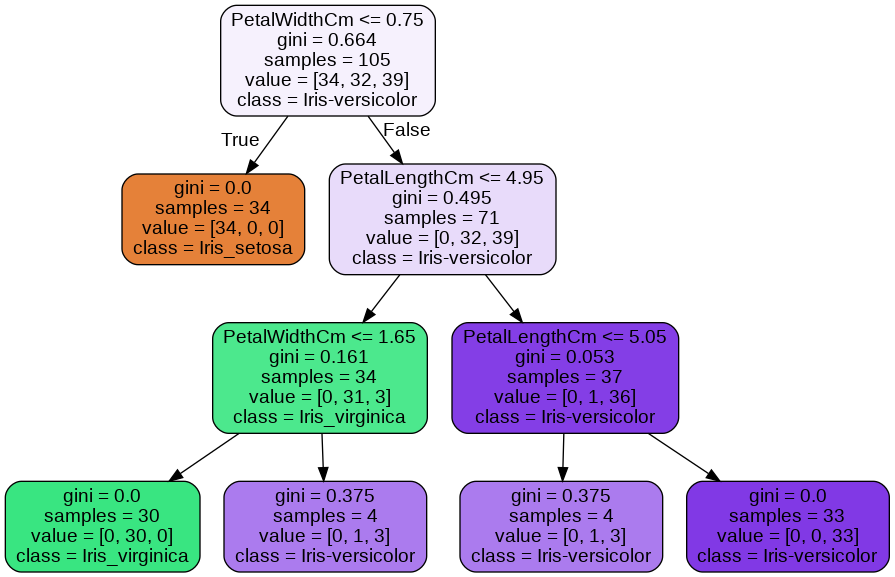

In [27]:
# Displaying the tree of the best model
g = get_dt_graph(best)
Image(g.create_png())

**`Final Conclusion: `**
- For the given sepal length, sepal width, petal length an petal width, the model needs to predict the correct species of Iris flower.
- Created the Decision Tree Classifier and visualised it graphically.
- Default Model Performance:
  - No parameter values were changed.
  - Training Set Accuracy: 1.0
  - Testing Set Accuracy: 0.977
- Model Performance with Hyper-Parameter Tuning:
  - The best parameters obtained after using cross validation technique are: max_depth: 3, min_samples_leaf: 1, min_samples_split: 5
  - Training Set Accuracy: 0.980
  - Testing Set Accuracy: 0.977
- From the above 2 models, the model with hyper parameter tuning has better train-test accuracy i.e., 0.98 and 0.977. Therefore, it can be used predict the right class accordingly.